In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

import pickle

In [2]:
# Lets read the proeccessed data 

df=pd.read_csv("C:/Users/Daya/Desktop/DataSets/AQI/final_data.csv")

In [3]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,0.022013,0.000000,0.146789,0.823344,0.935897,0.036364,0.162500,0.134650,219.720833
1,0.034591,0.081232,0.134557,0.851735,0.858974,0.054545,0.166667,0.165171,182.187500
2,0.000000,0.100840,0.073394,0.880126,0.794872,0.054545,0.183333,0.165171,154.037500
3,0.059748,0.159664,0.100917,0.858044,0.666667,0.090909,0.320833,0.335727,223.208333
4,0.179245,0.310924,0.134557,0.813880,0.525641,0.181818,0.345833,0.364452,200.645833


In [4]:
# Independent Features 
x=df.drop('PM 2.5',axis=1)

# Dependent Features 
y=df['PM 2.5']

In [5]:
# SPlit the data in train and test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Decision Tree Regressor

In [6]:
from sklearn.tree import DecisionTreeRegressor

tree_regression=DecisionTreeRegressor()

# We will try wihtout gird search cv 

In [7]:
tree_regression.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [8]:
tree_pred=tree_regression.predict(x_test)

In [9]:
print("ACCURACY:", r2_score(y_test, tree_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, tree_pred)))
print("MSE:", mean_squared_error(y_test, tree_pred))

ACCURACY: 0.6291719474969304
RMSE: 48.19252512144572
MSE: 2322.519477581177


In [10]:
# Let's try out grid search and see whether we can get better result than this

In [11]:
dtr_params = dict(max_depth=[3,5,8,10,15,17,None], max_features=["sqrt","log2","auto",None],
                  max_leaf_nodes=[None, 10,20,30,40,50,60,70,80,90,100],
                  min_weight_fraction_leaf = [0.0,0.1,0.5,0.2,0.25,0.3,0.35,0.4,0.5],
                  splitter=['best', "random"],min_samples_leaf=[1,2,3,4,5] )

In [12]:
tree_regressor=GridSearchCV(tree_regression,cv=5,param_grid=dtr_params,verbose=1,scoring="neg_mean_squared_error")

In [13]:
tree_regressor.fit(x_train,y_train)

tree_pred=tree_regressor.predict(x_test)

Fitting 5 folds for each of 27720 candidates, totalling 138600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 138600 out of 138600 | elapsed:  7.2min finished


In [14]:
tree_regressor.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 2,
 'min_weight_fraction_leaf': 0.0,
 'splitter': 'random'}

In [15]:
print("ACCURACY:", r2_score(y_test, tree_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, tree_pred)))
print("MSE:", mean_squared_error(y_test, tree_pred))

ACCURACY: 0.5408074817000483
RMSE: 53.627900380405315
MSE: 2875.9516992106765


# Random Forest Regression

In [16]:
from sklearn.ensemble import RandomForestRegressor

ran_for= RandomForestRegressor()

ran_for.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [17]:
ren_pred= ran_for.predict(x_test)

In [18]:
print("ACCURACY:", r2_score(y_test, ren_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, ren_pred)))
print("MSE:", mean_squared_error(y_test, ren_pred))

ACCURACY: 0.781106826960166
RMSE: 37.0262305177177
MSE: 1370.9417463511695


### HyperParameter Tuning

In [19]:

paramters = dict(max_depth=[int(x) for x in np.linspace(5, 30, num = 6)],
                 max_features=['auto', "log2", "sqrt", None],
                 min_samples_leaf=[1,2,5,10,15],
                 min_samples_split=[2, 5, 10,15,100],
                 min_weight_fraction_leaf=[0.0,0.05,0.5],
                 n_estimators=[int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)])

In [20]:
from sklearn.model_selection import RandomizedSearchCV

rfr=RandomForestRegressor()
random_forest_regressor = RandomizedSearchCV(rfr, paramters, scoring = "neg_mean_squared_error", cv = 5, verbose = 1,n_iter=100)
random_forest_regressor.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  6.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [24]:
random_forest_regressor.best_params_

{'n_estimators': 800,
 'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

In [25]:
random_forest_regressor.best_score_

-1318.3350211824843

In [21]:
ran_predict=random_forest_regressor.predict(x_test)

In [22]:
print("ACCURACY:", r2_score(y_test, ran_predict))
print("RMSE:", np.sqrt(mean_squared_error(y_test, ran_predict)))
print("MSE:", mean_squared_error(y_test, ran_predict))

ACCURACY: 0.7677104024212886
RMSE: 38.14242255060474
MSE: 1454.8443980288814


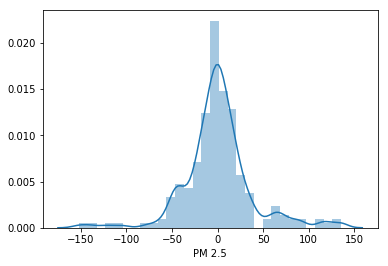

In [23]:
residual_random_forest = y_test - ran_predict
sns.distplot(residual_random_forest)

In [ ]:
import pickle
random_forest_file = open("random_forest.pkl", "wb")
pickle.dump(random_forest_regressor, random_forest_file)